In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="deep")

In [16]:
td3_data = pd.read_csv("./SB3/trained/transitions_e100_512_512.csv")
ddpg_ou_data = pd.read_csv("./SB3/trained/transitions_e100_ddpg_ou.csv")
ddpg_ga_data = pd.read_csv("./SB3/trained/transitions_e100_ddpg_ga.csv")
bo_data = pd.read_csv("./Baseline/transitions_bo.csv")
gs_data = pd.read_csv("./Baseline/transitions_gs.csv")

In [17]:
def visualize(transitions, col_headers=None):

    cols = len(transitions)
    fig, axs = plt.subplots(8, cols, sharey='row', figsize=(20, 25))
    fig.subplots_adjust(hspace=0.5, wspace=0.05)

    if col_headers:
        assert(len(col_headers) == len(transitions))

        for ax, col in zip(axs[0], col_headers):
            ax.set_title(col)

    axs[0, 0].set_ylabel("Production Level")
    axs[1, 0].set_ylabel("Stock (Factory)")
    axs[2, 0].set_ylabel("Stock (Warehouse 1)")
    axs[3, 0].set_ylabel("Stock (Warehouse 2)")
    axs[4, 0].set_ylabel("Shippping (WH1)")
    axs[5, 0].set_ylabel("Shipping (WH2)")
    axs[6, 0].set_ylabel("Reward")
    axs[7, 0].set_ylabel("Cum. Reward")

    for i, transition in enumerate(transitions):

        episodes = np.array(transition["episode"].unique())
        episode_num = np.random.randint(episodes.shape[0])
        transition = transition[transition["episode"] == episode_num]

        transition.reset_index(inplace=True)

        sns.lineplot(ax=axs[0, i], data=transition["factory_stock"], color='purple')
        sns.lineplot(ax=axs[1, i], data=transition["warehouse_stock_0"], color='purple')
        sns.lineplot(ax=axs[2, i], data=transition["warehouse_stock_1"], color='purple')
        sns.lineplot(ax=axs[3, i], data=transition["production_level"])
        sns.lineplot(ax=axs[4, i], data=transition["shipping_to_warehouse_0"])
        sns.lineplot(ax=axs[5, i], data=transition["shipping_to_warehouse_1"])
        sns.lineplot(ax=axs[6, i], data=transition["timestep_reward"], color='red')
        sns.lineplot(ax=axs[7, i], data=transition["total_reward"], color='red')

    return fig


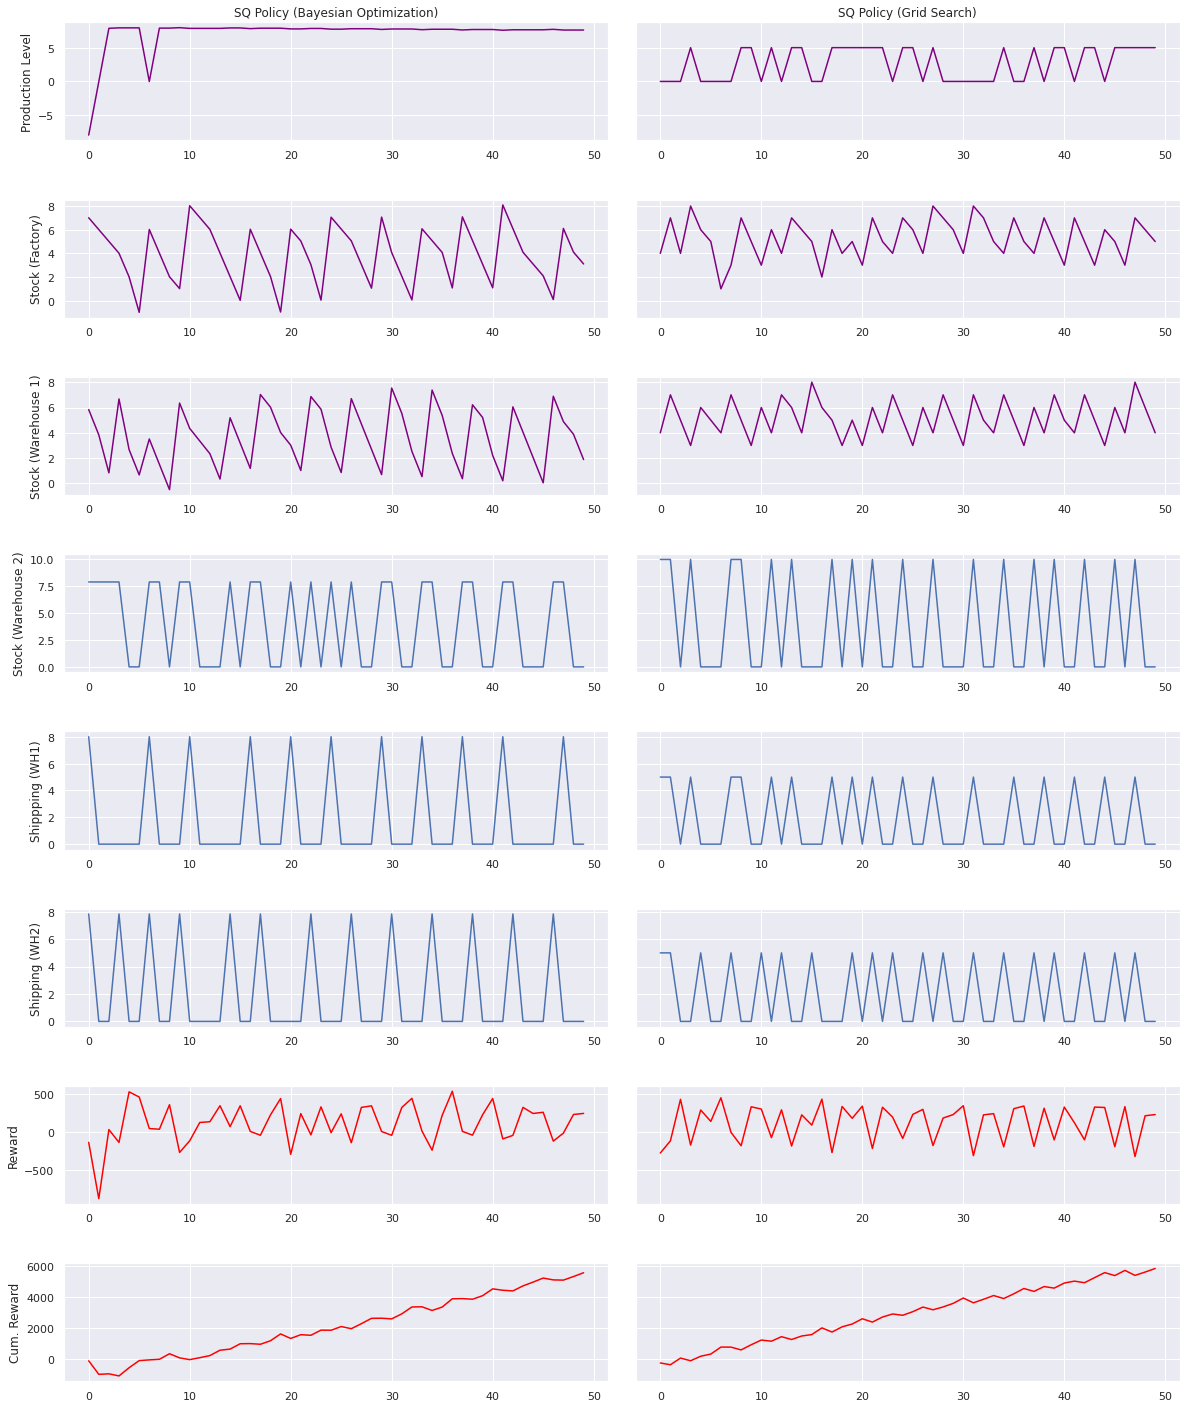

In [23]:
baseline_fig = visualize([bo_data, gs_data], col_headers=("SQ Policy (Bayesian Optimization)", "SQ Policy (Grid Search)"))
baseline_fig.savefig("BaselineTransitions.png", dpi=300)

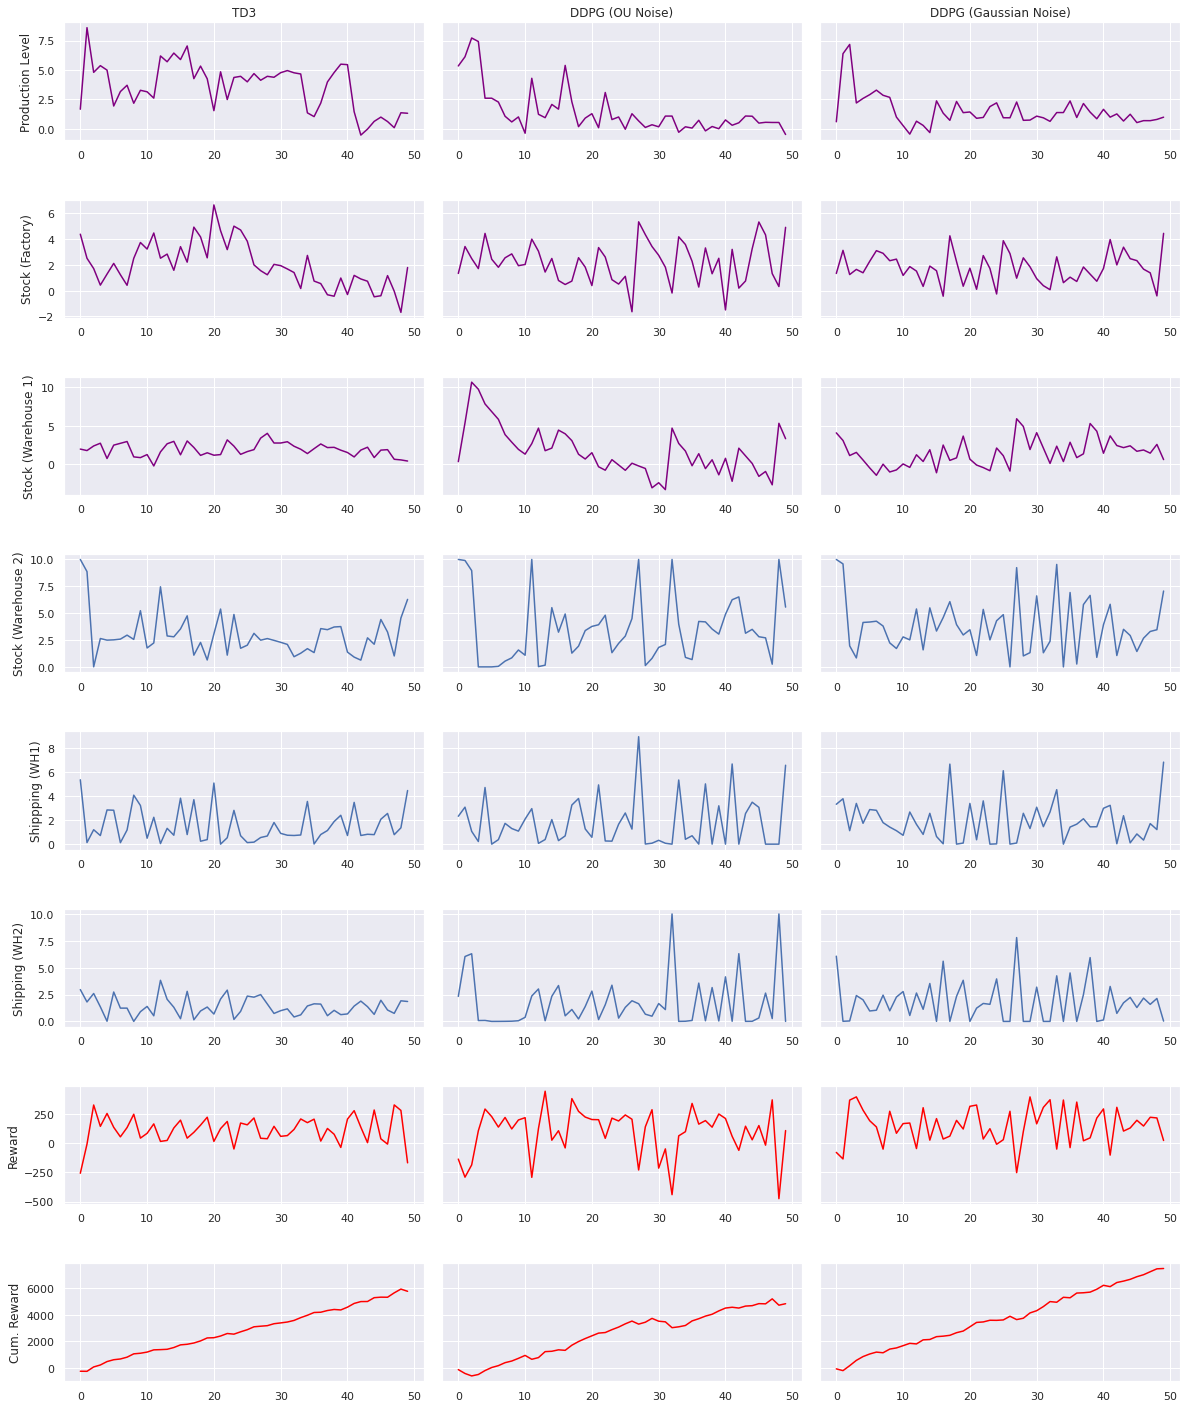

In [22]:
rl_fig = visualize([td3_data, ddpg_ou_data, ddpg_ga_data], col_headers=("TD3", "DDPG (OU Noise)", "DDPG (Gaussian Noise)"))
rl_fig.savefig("RLTransitions.png", dpi=300)

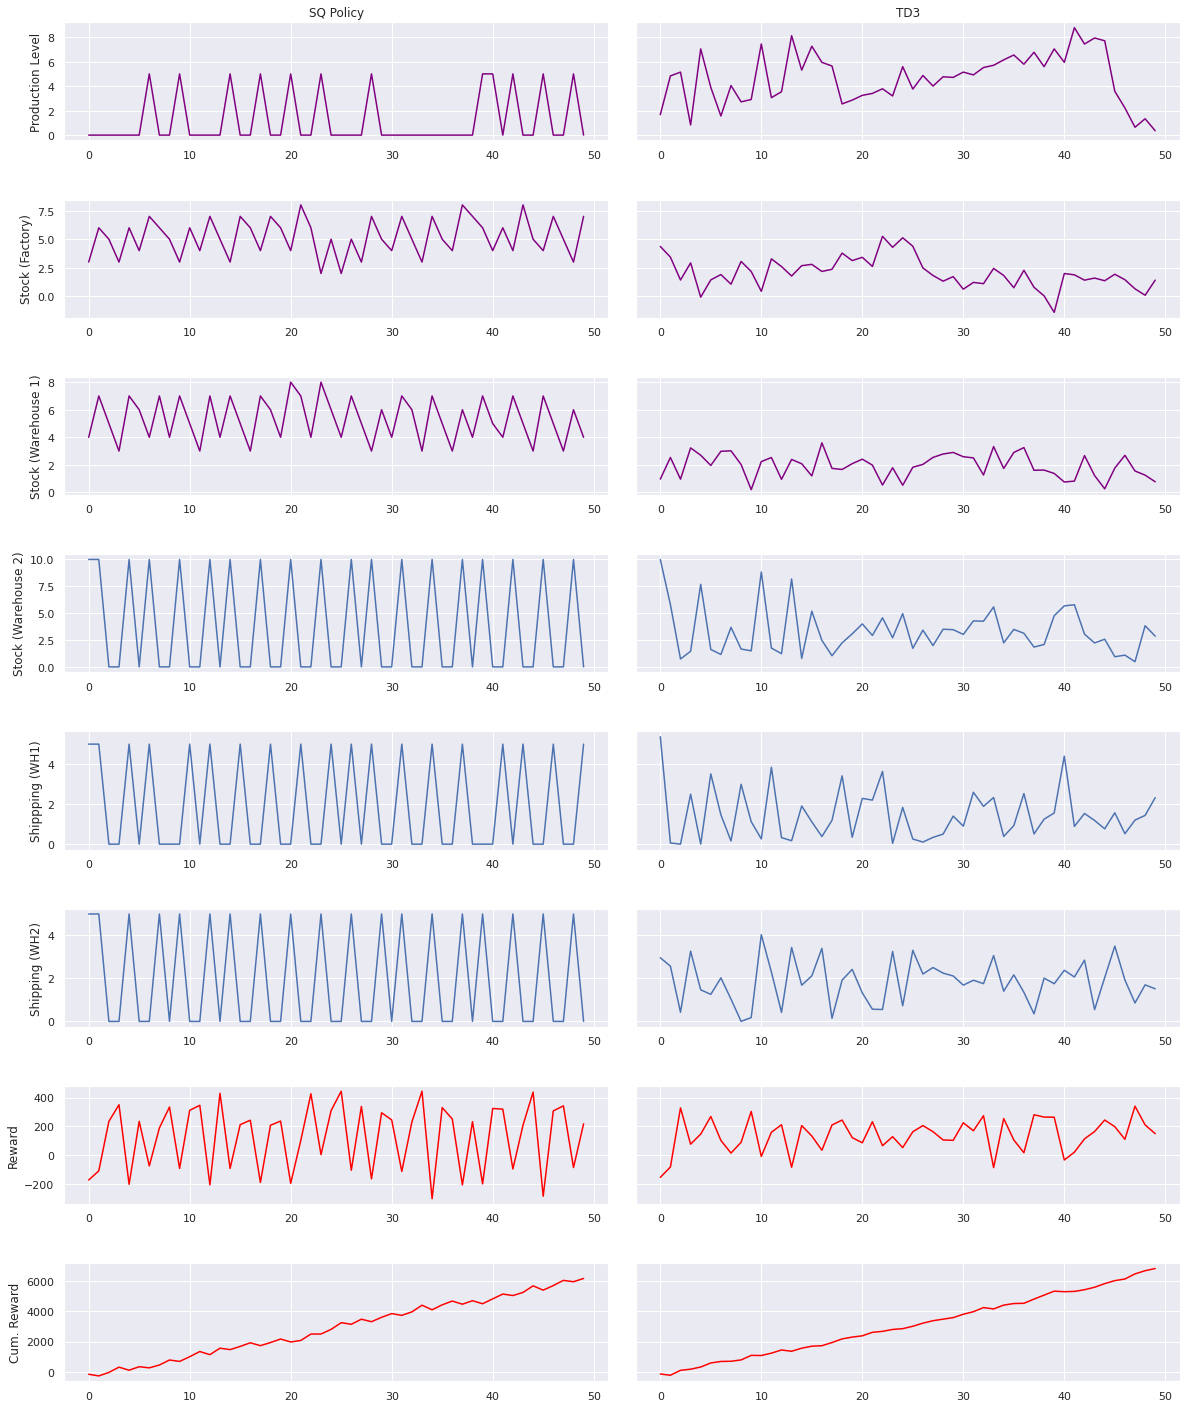

In [21]:
comp_fig = visualize([gs_data, td3_data], col_headers=("SQ Policy", "TD3"))
comp_fig.savefig("CompTransitions.png", dpi=300)

In [13]:
max_timesteps = bo_data["t"].max()
reward = pd.DataFrame()
# reward["SQ Policy (Bayesian Optim)"] = bo_data[bo_data["t"] == max_timesteps]["total_reward"]
# reward["SQ Policy (Grid Search)"] = gs_data[gs_data["t"] == max_timesteps]["total_reward"]
reward["DDPG (OU Noise)"] = ddpg_ou_data[ddpg_ou_data["t"] == max_timesteps]["total_reward"]
reward["DDPG (Normal Noise)"] = ddpg_ga_data[ddpg_ga_data["t"] == max_timesteps]["total_reward"]
reward["TD3"] = td3_data[td3_data["t"] == max_timesteps]["total_reward"]



In [14]:
print(reward.describe().to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  DDPG (OU Noise) &  DDPG (Normal Noise) &          TD3 \\
\midrule
count &       100.000000 &           100.000000 &   100.000000 \\
mean  &      5919.857497 &          6712.022324 &  6908.804928 \\
std   &       546.589196 &           369.934698 &   554.791618 \\
min   &      4243.253766 &          5205.745309 &  5028.133742 \\
25\%   &      5696.790404 &          6535.080093 &  6664.692108 \\
50\%   &      6003.205927 &          6696.306374 &  6868.734184 \\
75\%   &      6292.925239 &          6939.431120 &  7269.132868 \\
max   &      6994.619925 &          7476.943817 &  7987.011609 \\
\bottomrule
\end{tabular}



In [ ]:
reward.describe()

In [ ]:
sns.relplot(data=reward, kind="line", aspect=18/5, height=5)


In [ ]:
reward_boxplot = sns.catplot(data=reward, kind="box", height=5, aspect=1.8, palette="ch:s=.25,rot=-.25")
reward_boxplot.set_axis_labels("Algorithm", "Reward")
reward_boxplot.savefig("rewardboxplot.png", dpi=900)
# reward.boxplot()

In [ ]:
reward_violinplot = sns.catplot(data=reward, kind="violin", height=5, aspect=2.2, palette="ch:s=.25,rot=-.25")
reward_violinplot.set_axis_labels("Algorithm", "Reward")
reward_violinplot.savefig("rewardviolinplot.png", dpi=900)

In [ ]:
ddpg = pd.read_csv("./DDPG_DDPG_2.csv")
td3 = pd.read_csv("./TD3_TD3_300_400.csv")

critic_loss = pd.DataFrame()
critic_loss["DDPG"] = ddpg["Value"][:300]
critic_loss["TD3"] = td3["Value"][:300]


In [ ]:
p = sns.relplot(data=critic_loss, kind="line", aspect=6/5, height=5, palette="ch:s=.25,rot=-.25")
p.set_axis_labels("Epochs", "Critic Loss")
p.savefig("CriticLoss.png", dpi=900)
